In [2]:
import numpy as np
import camb
from matplotlib import pyplot as plt
import time

In [3]:
def get_spectrum(pars,lmax=2000):
    #print('pars are ',pars)
    H0=pars[0]
    ombh2=pars[1]
    omch2=pars[2]
    tau=pars[3]
    As=pars[4]
    ns=pars[5]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[2:1201,0] #you could return the full power spectrum here if you wanted to do say EE
    return tt

In [4]:
wmap=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt')
data = wmap[:,1]
err = wmap[:,2]
p0=np.asarray([65,0.02,0.1,0.05,2e-9,0.96])
testfit = get_spectrum(p0)
fit = testfit[:len(data)]


In [5]:
def calc_chisq(data,M,err):
    chisq = np.sum(((data - M)/err)**2)
    return chisq

<ErrorbarContainer object of 3 artists>

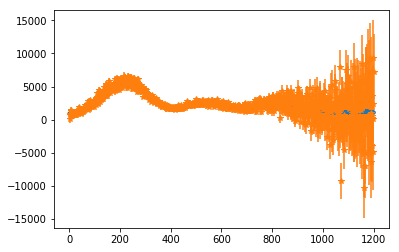

In [6]:
plt.plot(fit,".")
plt.errorbar(wmap[:,0],wmap[:,1],wmap[:,2],fmt='*')
#plt.plot(testfit)
#plt.plot(fit,".")

Here is the $\chi^2$ for the params given in the problem.

In [7]:
print(calc_chisq(data,testfit,err))

1588.2376532931526


In [8]:
def calc_J(p,d):
    t0 = time.time()
    J = np.zeros([len(p),1201-2])
    for i in range(len(p)):
        print(i)
        np.put(p,i,p[i]+d[i])
        up = get_spectrum(p)
        np.put(p,i,p[i]-2*d[i])
        down = get_spectrum(p)
        dy_dpi = (up - down)/(2*d[i])
        J[i] = dy_dpi
    t1 = time.time()
    print('time'+str(t1-t0))
    return np.transpose(J)

p0 values: [65,0.02,0.1,0.05,2e-9,0.96]

In [9]:
d = p0/100
print(d)

[6.5e-01 2.0e-04 1.0e-03 5.0e-04 2.0e-11 9.6e-03]


So the idea here is to show that our approximations for the grad are good. start with a fraction of the intial parameters given for the $\delta$ to calculate the grad then compare that too what you would get with bigger and smaller $\delta$. idealy we want it to be small enough that it is acuate but not so small we start running into round off error.

In [10]:
J1 = calc_J(p0,d*10)
J2 = calc_J(p0,d)
J3 = calc_J(p0,d/10)
J4 = calc_J(p0,d/100)

0
1
2
3
4
5
time73.42301607131958
0
1
2
3
4
5
time67.79914140701294
0
1
2
3
4
5
time70.53815650939941
0
1
2
3
4
5
time69.68440008163452


here we plot the dervivites with differnt $\delta$ sizes. you can see that bigger $\delta$ tend to be simmilar but not quite the same as the smaller $\delta$ if it was too small we would start seeing more small jumps that are random from the round off error. I picked mine to be pretty big because I dont see much difference and the effect of round off error would likely be worse than the alternitive. the $\delta$  chossen looks the same as the smaller deltas to a precision that we need for the fitter. (hopfully) 

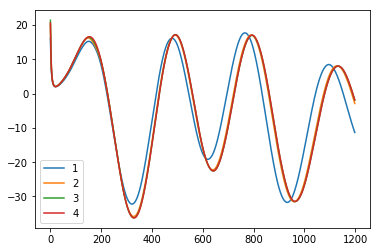

In [11]:
plook = 0
plt.plot(J1[:,plook],label='1')
plt.plot(J2[:,plook],label='2')
plt.plot(J3[:,plook],label='3')
plt.plot(J4[:,plook],label='4')
plt.legend()


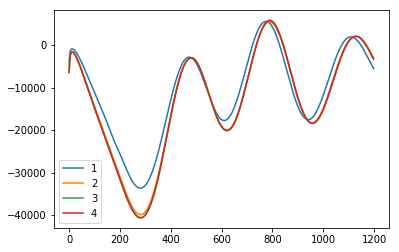

In [12]:
plook = 2
plt.plot(J1[:,plook],label='1')
plt.plot(J2[:,plook],label='2')
plt.plot(J3[:,plook],label='3')
plt.plot(J4[:,plook],label='4')
plt.legend()


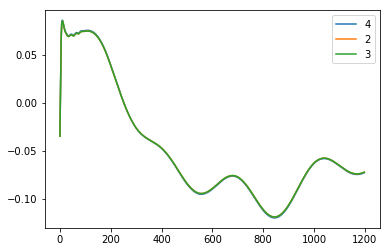

In [13]:
plook = 3
plt.plot((J4[:,plook]-J1[:,plook])/np.mean(J1[:,plook]),label='4')
plt.plot((J3[:,plook]-J1[:,plook])/np.mean(J1[:,plook]),label='2')
plt.plot((J3[:,plook]-J1[:,plook])/np.mean(J1[:,plook]),label='3')
plt.legend()

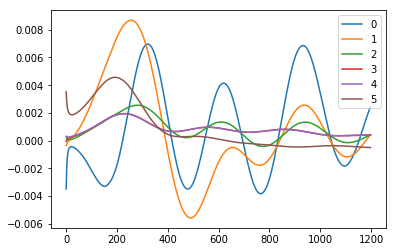

In [14]:
plt.plot(J1[:,0]/sum(J1[:,0]),label='0')
plt.plot(J1[:,1]/sum(J1[:,1]),label='1')
plt.plot(J1[:,2]/sum(J1[:,2]),label='2')
plt.plot(J1[:,3]/sum(J1[:,3]),label='3')
plt.plot(J1[:,4]/sum(J1[:,4]),label='4')
plt.plot(J1[:,5]/sum(J1[:,5]),label='5')
plt.legend()